# <span style="color:mediumvioletred"> **Informe Final**</span>
### **Proyecto de Ciencia de Datos**
- Aissa Berenice Gonzalez Fosado
- Clara Paola Aguilar Casillas
- Daniela de la Torre Gallo


<img src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal-Gris.png"  width="300">

## **Introducción**
**Contexto**

El análisis de datos en el mercado inmobiliario de alquiler es fundamental en la industria de bienes raíces, ya que influye en las decisiones de arrendadores, inquilinos, inversores y autoridades urbanas.

El conjunto de datos “Apartment for Rent Classified” proviene del repositorio UCI Machine Learning y contiene anuncios clasificados de apartamentos en alquiler en Estados Unidos, con atributos como precio, área (pies cuadrados), amenidades (p. ej., internet, piscina) y ubicación geográfica.

**Problema general y relevancia**

Detectar, limpiar y transformar los datos de anuncios para permitir tareas analíticas y predictivas (por ejemplo, modelar el precio de renta). Esto es relevante porque:

Mejora la transparencia del mercado al producir estimadores robustos.

Permite servicios de recomendación y valoración automática.

Reduce sesgos debidos a datos sucios (anuncios incompletos o duplicados)


**Alcance de esta primera entrega**

Incluye: contexto, revisión bibliográfica breve, objetivos, formulación del problema, resumen del EDA y data-wrangling realizado, evidencias antes/después y roadmap inmediato.

No incluye (por ahora): modelos predictivos finales, validación cruzada exhaustiva ni experimentos de feature engineering complejos (queda para la siguiente entrega).


**Descripción del Dataset**

Consta de 10.000 registros y 22 columnas, admitiendo tareas de clasificación, regresión y agrupamiento

Estas son las variables:

| Campo          | Descripción                                                                                                        |
| -------------- | ------------------------------------------------------------------------------------------------------------------ |
| d              | identificador único del apartamento                                                                                |
| category       | categoría del anuncio                                                                                              |
| title          | título del apartamento                                                                                             |
| body           | descripción del apartamento                                                                                        |
| amenities      | comodidades (ej. aire acondicionado, cancha de básquetbol, cable, gimnasio, internet, alberca, refrigerador, etc.) |
| bathrooms      | número de baños                                                                                                    |
| bedrooms       | número de recámaras                                                                                                |
| currency       | moneda del precio                                                                                                  |
| fee            | cuota / comisión                                                                                                   |
| has\_photo     | indica si el apartamento tiene foto                                                                                |
| pets\_allowed  | qué mascotas están permitidas (perros, gatos, etc.)                                                                |
| price          | precio de renta del apartamento                                                                                    |
| price\_display | precio convertido en un formato para mostrar al lector                                                             |
| price\_type    | precio en USD                                                                                                      |
| square\_feet   | tamaño del apartamento (en pies cuadrados)                                                                         |
| address        | dirección del apartamento                                                                                          |
| cityname       | ciudad donde se ubica el apartamento                                                                               |
| state          | estado donde se ubica el apartamento                                                                               |
| latitude       | latitud donde se ubica el apartamento                                                                              |
| longitude      | longitud donde se ubica el apartamento                                                                             |
| source         | origen del anuncio                                                                                                 |
| time           | fecha de creación del anuncio                                                                                      |

## **Antecedentes**
**Trabajos previos o casos similares**

1. **Rosen (1974)** — Modelo hedónico de precios aplicado al valor de inmuebles.
2. **Kaggle: House Prices Advanced Regression** — Competencia sobre predicción de precios con datos estructurados.
3. **UCI Housing Data** — Dataset clásico para regresión de precios de vivienda.
4. **Artículos recientes** sobre análisis de anuncios inmobiliarios y detección de duplicados (proptech, 2023–2024).

 **Influencia en el enfoque**
Se retoman prácticas comunes:
- Creación de variables derivadas como `price_per_m2`.
- Filtrado de outliers mediante reglas de negocio.
- Encoding de categorías de alta cardinalidad.

 **Brecha u oportunidad**

Muchos proyectos priorizan el modelado sin detallar el proceso de limpieza. Este trabajo **enfatiza la trazabilidad del wrangling** como base para obtener resultados confiables.


## **Objetivos**

**Objetivo general**
Desarrollar y evaluar modelos de aprendizaje automático para predecir el precio de alquiler de apartamentos usando el dataset “Apartment for Rent Classified”, cuantificando el desempeño con métricas estándar.

**Objetivos específicos:**
Evaluar la calidad y estructura del dataset (tipos de variables, valores faltantes, duplicados) mediante análisis exploratorio.
Proponer y aplicar procedimientos de limpieza y transformación de datos, incluyendo conversión de formatos (p. ej. eliminar símbolos de moneda en price) y extracción de atributos relevantes (codificación de amenities, creación de regiones geográficas).
Realizar un análisis exploratorio descriptivo de variables clave (distribuciones de precios, correlaciones entre price y atributos, segmentación espacial) para identificar patrones iniciales.
Entrenar y comparar modelos básicos de ML (por ejemplo: regresión lineal, regresión de árbol, Random Forest, XGBoost) para predecir el precio de alquiler (y opcionalmente clasificar atributos categóricos), estableciendo métricas base de desempeño (R², RMSE, precisión, etc.).
**Criterios de éxito:** Modelos que logren una precisión alta en predicción


## **Planteamiento del problema**

Pregunta de negocio: predecir el precio de alquiler de un apartamento usando atributos del anuncio (ubicación, tamaño, recámaras/baños, amenidades, etc.) y, de forma complementaria, clasificar anuncios (ej. rango de precios o tipo de pago).

Variables clave: entradas como bedrooms, bathrooms, square_feet, amenities, cityname, state, pets_allowed; variable objetivo principal: price (USD). Tareas adicionales: clasificación con price_type o pets_allowed.

Impacto esperado: facilitar precios justos, ayudar a inquilinos y dueños en la toma de decisiones, y aportar insights sobre tendencias de mercado y asequibilidad.

Sesgo de muestreo: los datos provienen de anuncios en portales específicos, por lo que pueden no reflejar todo el mercado (ejemplo: ausencia de zonas rurales o precios atípicos).

Variables textuales complejas: atributos como amenities, title o body contienen muchos valores posibles, lo que dificulta su codificación sin pérdida de información.

Data leakage: se deben excluir variables redundantes, como price_display (derivada directamente de price), para evitar filtrar la respuesta.

Distribuciones sesgadas: es probable encontrar outliers de precio asociados a ciertas zonas o amenidades, lo que requerirá normalización o modelos robustos.

Limitaciones temporales: aunque existe la variable de fecha de publicación, en esta etapa no se abordarán dinámicas temporales avanzadas (forecasting).

Calidad de datos: pese a que no hay valores faltantes, pueden presentarse inconsistencias de formato (ejemplo: símbolos o comas en los precios) que requerirán limpieza.

## **EDA**
Se puede ver a fondo en el notebook `01_eda_inicial.ipynb`

Se exploró el Dataset por variables nulas, duplicados, errores en el formato, outliers, correlación y distribuciones.
Nuestros insights son los siguientes
El dataset es completo y bien estructurado, pero contiene valores nulos significativos que tendremos que imputar según las necesidades, pero no hubieron duplicados.
Se identifican posibles outliers en price, square_feet, bedrooms y bathrooms, que manejaremos en Wrangling.
Existen columnas con baja variabilidad (currency, fee, category) que probablemente no aporten valor predictivo.
Las variables geográficas y numéricas son coherentes y útiles para análisis espacial o modelado.

**Visualizaciones Representativas**


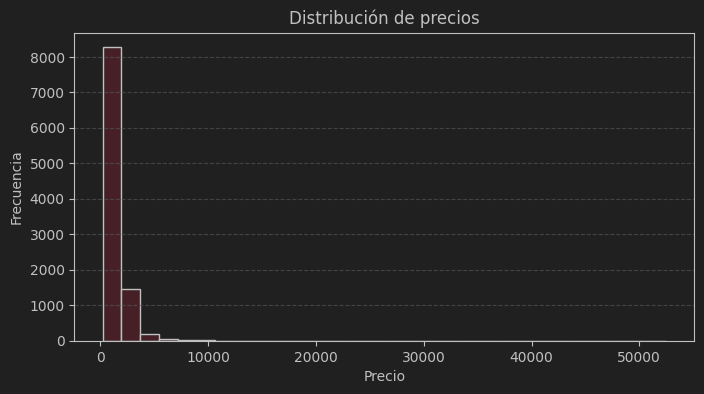
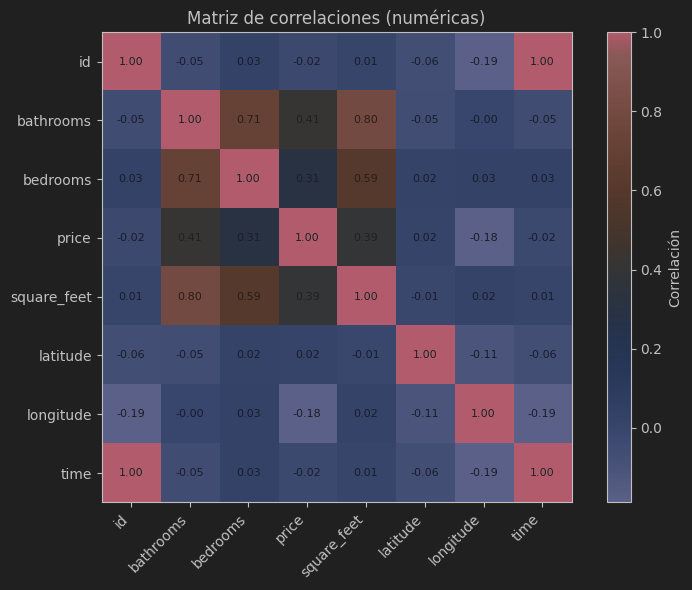
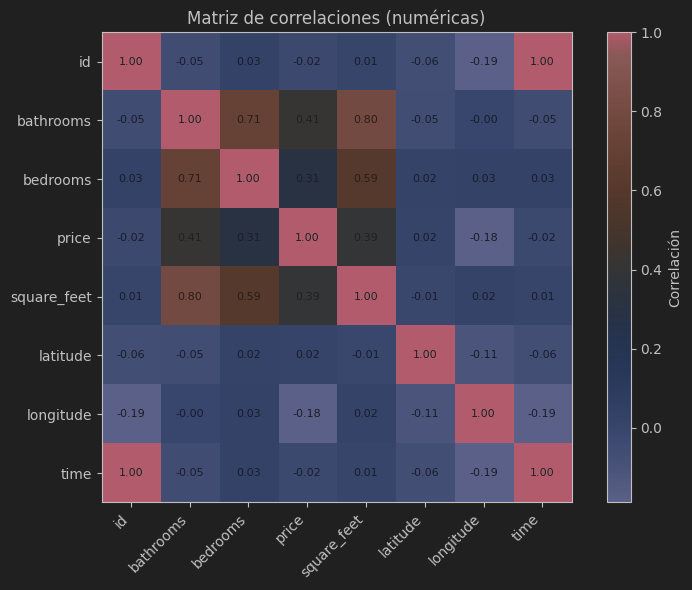


##  **Data Wrangling**
- Reglas aplicadas por tema: nulos, duplicados, outliers, casting/encoding, reglas de negocio.
- Mini-evidencias **antes/después** (tabla/figura).
- Estado del dataset limpio (ruta en `data/processed/` y esquema final).

Se puede ver a fondo en el notebook `02_data_wrangling.ipynb` y su resultado en `data/processed/`

Después del EDA, nos concentramos en la realización de nuestras conclusiones del EDA, imputamos valores nulos, eliminamos outliers con cuartiles y también hicimos selección de variables, basandonos en la correlacion, debajo hay una comparacion de los diagramas de antes/ despues de la limpieza.

**Visualizaciones Representativas**

**Antes**

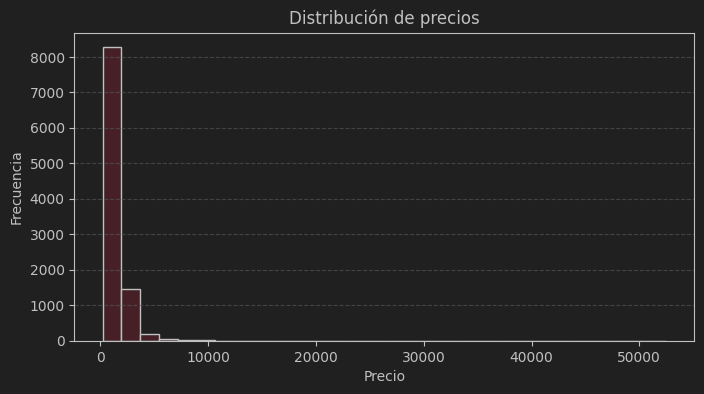


**Despues**

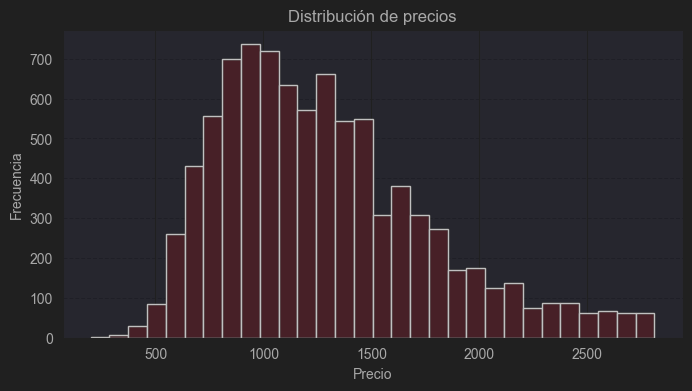

## **Conclusiones parciales y próximos pasos**

**Avances logrados**

- EDA inicial completo y documentado.
- Limpieza y normalización de datos implementada.
- Dataset final preparado para análisis avanzado.

**Limitaciones**

- Quizá tengamos limitaciones en nuestra capacidad de computación a la hora de hacer los modelos.
- Posible sesgo geográfico o económico.

**Próximos pasos**

1. **Feature Engineering:** derivar más variables (amenities, relaciones).
2. **Particiones de datos:** train/val/test reproducibles.
3. **Baselines predictivos:** regresión lineal, RF, XGBoost.
4. **Evaluación:** métricas RMSE, MAE, R².
5. **Fairness:** revisar desempeño por zona o rango de precios.

## **Referencias**
- Rosen, S. (1974). *Hedonic Prices and Implicit Markets*.
- Wickham, H. (2014). *Tidy Data*. Journal of Statistical Software.
- UCI Machine Learning Repository: *Apartments for Rent Classified*.
- Kaggle: *House Prices Advanced Regression Techniques*.
- [data wrangling.pdf](data%20wrangling.pdf)

